In [1]:
%matplotlib inline
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')


In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [46]:
from scipy.io import wavfile
samplingRate, vA = wavfile.read('Toto - Africa.wav')
vA=vA.astype(np.float)
[vA, samplingRate]


[array([0., 0., 0., ..., 0., 0., 0.]), 22050]

In [47]:
plt.plot(vA[0:20000])

In [48]:
testSignalStartIdx  = 6000;
testSignalEndIdx    = 20000;

refSignalStartIdx   = testSignalStartIdx + 11000;
refSignalEndIdx     = refSignalStartIdx + 2000;

refSignalStartIdx, refSignalEndIdx

(17000, 19000)

In [49]:
vTestSignal = vA[testSignalStartIdx:testSignalEndIdx];
vRefSignal  = vA[refSignalStartIdx:refSignalEndIdx];
vTestSignal.shape,vRefSignal.shape

((14000,), (2000,))

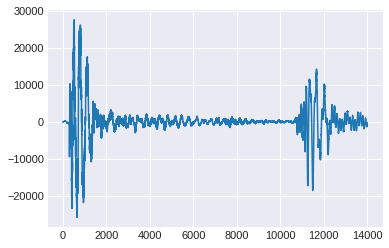

In [50]:
plt.plot(vTestSignal)

In [51]:
plt.plot(vRefSignal)

In [99]:
def detect_signal(sig,wav, step=1, threshold=None):
    vTestSignal = wav.astype(np.float)
    sig=sig.astype(np.float)
    f_norm = lambda u:  np.sqrt(np.sum(u*u));
    vRefSignal = sig/f_norm( sig)

    numSamplesTestSignal    = len(vTestSignal);
    numSamplesRefSignal     = len(vRefSignal);

    vCrossCorrelationNormalizedVal  = np.zeros([numSamplesTestSignal - numSamplesRefSignal + 1, ]);

    
    for ii in range(len(vCrossCorrelationNormalizedVal)):
        if ii%step ==0:
            vTestSignalSamples                  = vTestSignal[ii : ii + numSamplesRefSignal]
            vCrossCorrelationVal             = np.sum(vTestSignalSamples * vRefSignal)
            vCrossCorrelationNormalizedVal[ii]  = vCrossCorrelationVal  / ( f_norm(vTestSignalSamples));


    if threshold is None:
        crossCorrelationNormalizedMaxIdx   = np.argmax(np.abs(vCrossCorrelationNormalizedVal));
        return crossCorrelationNormalizedMaxIdx, vCrossCorrelationNormalizedVal[crossCorrelationNormalizedMaxIdx]
    else:
        vCrossCorrelationNormalizedVal = list(enumerate(np.abs(vCrossCorrelationNormalizedVal)))
        vCrossCorrelationNormalizedVal = sorted(vCrossCorrelationNormalizedVal, key=lambda u: -u[1])
        return [u for u in vCrossCorrelationNormalizedVal if u[1]>threshold ]


In [98]:
detect_signal(vRefSignal,vTestSignal,step=3)

(11001, 0.9980183876372649)

In [102]:
detect_signal(vRefSignal,vTestSignal,step=3, threshold=0.7)

[(11001, 0.9980183876372649),
 (10998, 0.9961318871676874),
 (11004, 0.9893358001128695),
 (10995, 0.9842215250440276),
 (11007, 0.9715486953159365),
 (10992, 0.963658127233309),
 (11010, 0.9451537625637891),
 (10989, 0.9343677142580591),
 (11013, 0.9102957312808698),
 (10986, 0.8964062140396575),
 (11016, 0.867247561049364),
 (10983, 0.8506087628346295),
 (11019, 0.8172948502094822),
 (10980, 0.7982292981635636),
 (144, 0.7972168948131497),
 (141, 0.7952230683872971),
 (147, 0.7944510319437924),
 (138, 0.7891601775988996),
 (150, 0.7870174274844747),
 (135, 0.7787469265203795),
 (153, 0.7745781202411185),
 (132, 0.7646477180488904),
 (11022, 0.7610598351503493),
 (156, 0.7569169087842622),
 (129, 0.7474971274007262),
 (10977, 0.7401040498285721),
 (159, 0.7343426037271914),
 (126, 0.7262663695198364),
 (162, 0.706933833726833),
 (123, 0.7024473768574593),
 (11025, 0.7002073758462061)]

In [52]:
numSamplesTestSignal    = len(vTestSignal);
numSamplesRefSignal     = len(vRefSignal);

vCrossCorrelationVal            = np.zeros([numSamplesTestSignal - numSamplesRefSignal + 1, 1]);
vCrossCorrelationNormalizedVal  = np.zeros([numSamplesTestSignal - numSamplesRefSignal + 1, 1]);
vCrossCorrelationVal.shape,vCrossCorrelationNormalizedVal.shape

((12001, 1), (12001, 1))

In [53]:
 np.sqrt(np.sum(vRefSignal*vRefSignal))

265281.77176730405

In [54]:
numSamplesRefSignal

2000

In [55]:
f_norm = lambda u:  np.sqrt(np.sum(u*u));
refSignalNorm = f_norm(vRefSignal)


In [56]:

for ii in range(len(vCrossCorrelationVal)):
    vTestSignalSamples                  = vTestSignal[ii : ii + numSamplesRefSignal]
    vCrossCorrelationVal[ii]            = np.sum(vTestSignalSamples * vRefSignal)
    vCrossCorrelationNormalizedVal[ii]  = vCrossCorrelationVal[ii] / (refSignalNorm * f_norm(vTestSignalSamples));



crossCorrelationMaxIdx             = np.argmax(np.abs(vCrossCorrelationVal));
crossCorrelationNormalizedMaxIdx   = np.argmax(np.abs(vCrossCorrelationNormalizedVal));



In [65]:
np.abs(vCrossCorrelationVal).max()

87738975805.0

In [66]:
np.abs(vCrossCorrelationNormalizedVal).max()

1.0

In [ ]:
crossCorrelationMaxIdx

In [80]:
np.argsort(np.abs(vCrossCorrelationNormalizedVal.reshape([1,-1]))) 

array([[ 3126, 10257, 10387, ..., 10999, 11001, 11000]])

In [77]:
np.argsort(np.abs(vCrossCorrelationVal.reshape([1,-1]))) 

array([[3126, 8407, 8564, ...,  145,  143,  144]])

In [58]:
crossCorrelationMaxIdx,crossCorrelationNormalizedMaxIdx

(144, 11000)

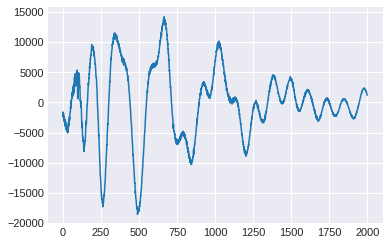

In [59]:
plt.plot(vRefSignal)

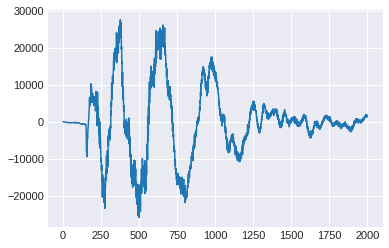

In [61]:
plt.plot(vTestSignal[crossCorrelationMaxIdx:crossCorrelationMaxIdx+len(vRefSignal)])

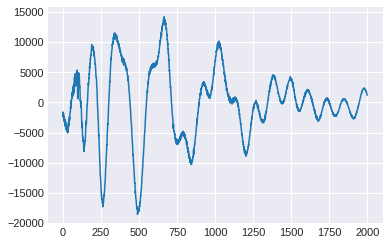

In [62]:
plt.plot(vTestSignal[crossCorrelationNormalizedMaxIdx:crossCorrelationNormalizedMaxIdx+len(vRefSignal)])